# Model Creation - 2

### This model will look at variations within districts, using vintage describers to understand changes

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt

from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import interp1d
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.ndimage import gaussian_filter1d
from scipy import stats
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import Data
Start by importing the training and testing data.

In [2]:
train = pd.read_csv(r'C:\Users\fwhal\Downloads\CME528\Project\Repo-2\BreakinBadCode\Final_DataFrames\FINAL_training_data_Model2_FINAL.csv')
train

,Producer,WineType,District,Year,Ratings Average,Price,Type,January Max Temp (°C),January Min Temp (°C),January Avg Temp (°C),...,December Avg Relative Humidity,December Cumulative Rain (mm),December Cumulative Snow (mm),December Cumulative Precip (mm),December Avg Cloud Cover (%),December Max Wind Speed (Km/h),December Min Wind Speed (Km/h),December Avg Wind Speed (Km/h),December Avg Daylight Hours,Producer/WineType/Year
0,francis ford coppola winery,archimedes,Sonoma,2019,4.4,104.79,top_listed,21.273500,-0.4765,10.004548,...,98.354058,247.800000,0.0,247.800000,71.985215,25.562534,0.000000,7.202130,9.533504,fisher vineyards/cabernet sauvignon/2019
1,francis ford coppola winery,archimedes,Sonoma,2018,4.4,104.79,best_user_rated,21.373500,1.2735,10.361067,...,96.505723,75.900000,0.0,75.900000,60.690860,25.346148,0.360000,6.735369,9.532272,fisher vineyards/cabernet sauvignon/2018
2,francis ford coppola winery,archimedes,Sonoma,2017,4.4,104.79,NaN,19.073502,-2.3265,7.673298,...,91.867615,0.700000,0.0,0.700000,51.584677,18.356470,0.000000,5.660764,9.531398,fisher vineyards/cabernet sauvignon/2017
3,francis ford coppola winery,archimedes,Sonoma,2016,4.4,104.79,NaN,17.079498,-1.9705,9.425199,...,94.394641,118.899999,0.0,118.899999,54.302419,19.645580,0.000000,6.646974,9.530239,fisher vineyards/cabernet sauvignon/2016
4,francis ford coppola winery,archimedes,Sonoma,2015,4.4,104.79,NaN,23.679500,-0.6205,10.136422,...,94.876585,145.100001,0.0,145.100001,62.354838,26.302181,0.360000,7.692760,9.533807,fisher vineyards/cabernet sauvignon/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32141,quinta do pôpa,tinto,Torre de Moncorvo,2015,3.7,21.55,NaN,15.473001,4.7730,10.533820,...,93.496440,60.400000,0.0,60.400000,70.224462,39.792620,0.804984,14.734718,9.513676,quinta da romaneira/tinto/2015
32142,quinta do pôpa,tinto,Torre de Moncorvo,2014,3.9,21.55,NaN,17.223000,8.6230,12.470177,...,88.645118,32.900000,0.0,32.900000,37.629032,35.105072,1.138420,17.896705,9.512410,quinta da romaneira/tinto/2014
32143,quinta do pôpa,tinto,Torre de Moncorvo,2013,3.8,21.55,NaN,15.323000,5.8730,11.860433,...,88.491065,68.500000,0.0,68.500000,47.349462,48.262825,0.804984,16.391871,9.511364,quinta da romaneira/tinto/2013
32144,quinta do pôpa,tinto,Torre de Moncorvo,2012,4.0,21.55,NaN,16.823000,5.7230,10.709156,...,93.017192,64.200000,0.0,64.200000,65.198924,41.288720,1.800000,13.911057,9.509958,quinta da romaneira/tinto/2012


In [3]:
train['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2006, 2021, 2020, 2007, 2005, 2004, 2003, 1997, 2022, 2023,
       1990, 2002, 2001, 2000, 1999, 1998, 1996, 1995, 1994, 1993, 1992,
       1991, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979,
       1978, 1977, 1976, 1989, 1968, 1969, 1972, 1975, 1939, 1974, 1902,
       1973, 1971, 1970, 1951, 1950, 1964, 1955, 1967, 1962, 1959, 1966,
       1961, 1960, 1965, 1963, 1958, 1957, 1953, 1952, 1949, 1947, 1945,
       1934, 1956, 1937, 1924, 1926, 1948, 1942, 1925, 1928], dtype=int64)

## Exploratory Data Anlysis
Visially and graphically look at data

Looking at the districts below, we can see clear time dependent trends in the data 

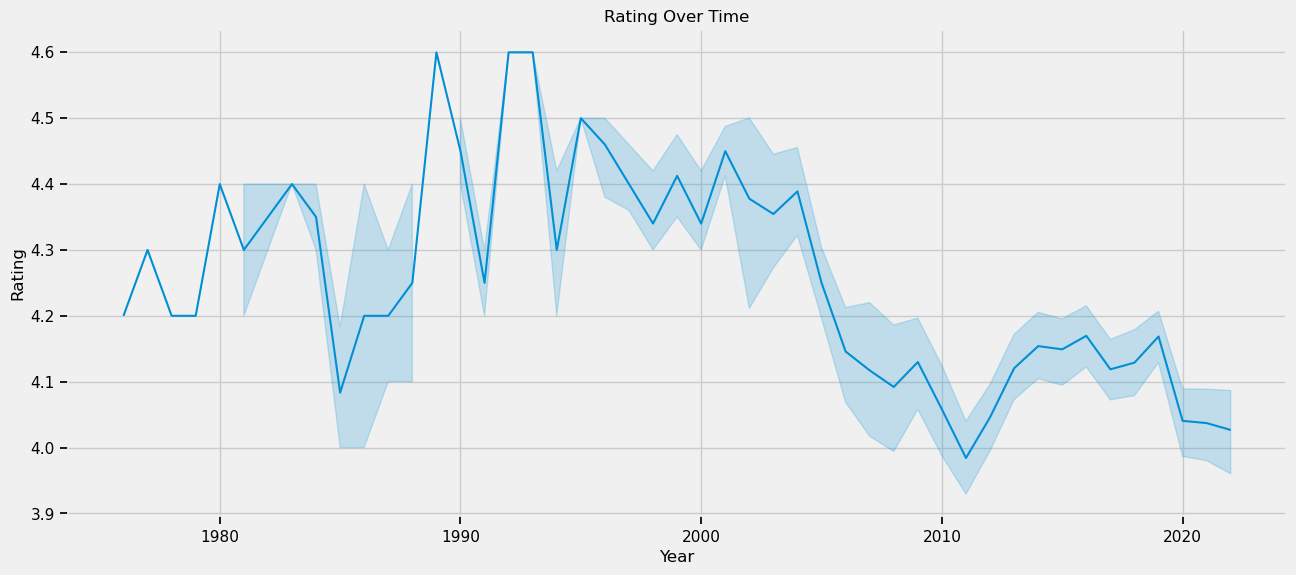

In [4]:
#Set out figure size
plt.figure(figsize=(14, 6))

#Set out lineplot and data
sns.lineplot(data = train[train['District'] == 'Sonoma'], x = 'Year', y = 'Ratings Average')

#Adding labels and title
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Rating Over Time')

#Show the plot
plt.show()

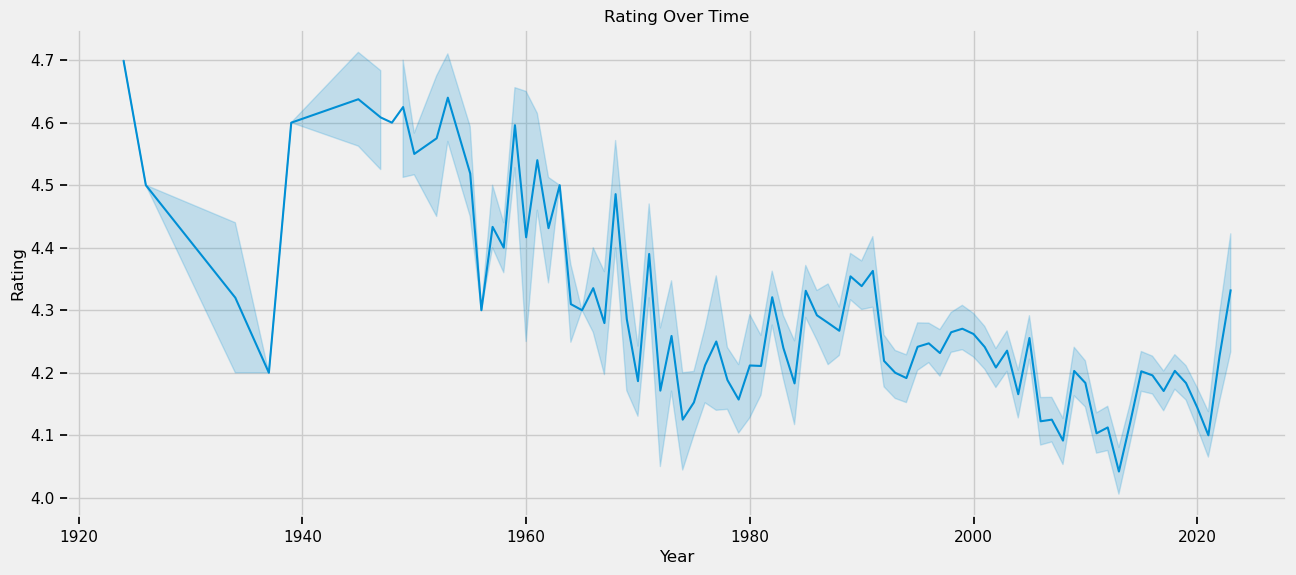

In [5]:
#Set out figure size
plt.figure(figsize=(14, 6))

#Set out lineplot and data
sns.lineplot(data = train[train['District'] == 'Gironde'], x = 'Year', y = 'Ratings Average')

#Adding labels and title
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Rating Over Time')

#Show the plot
plt.show()

Comparing this graph to a similar one from the first machine learning model, we can see a clear scew towards a single district. 
- Indicates that a large volume of data comes from a single district
- Means more vintage data is available from this single district

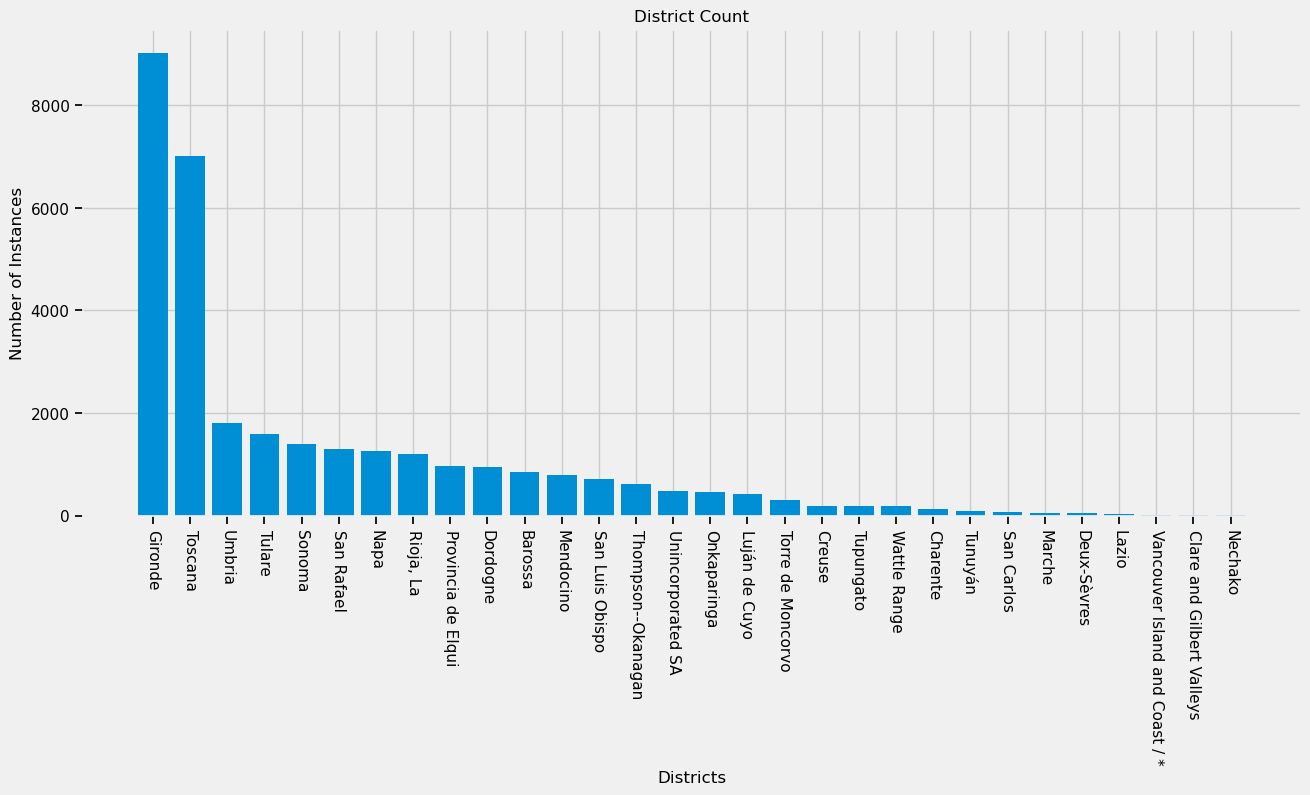

In [6]:
#Set out figure size
plt.figure(figsize=(14, 6))

#Define the data
categories =  train['District'].value_counts()

#Customizing Bar Plot
plt.bar(categories.index, categories.values)

#Adding labels and title
plt.xlabel('Districts')
plt.ylabel('Number of Instances')
plt.title('District Count')

#Rotate data
plt.xticks(rotation=270)

#Show the plot
plt.show()

Looking at a heatmap, we can see a slight decreasing trend of ratings with years

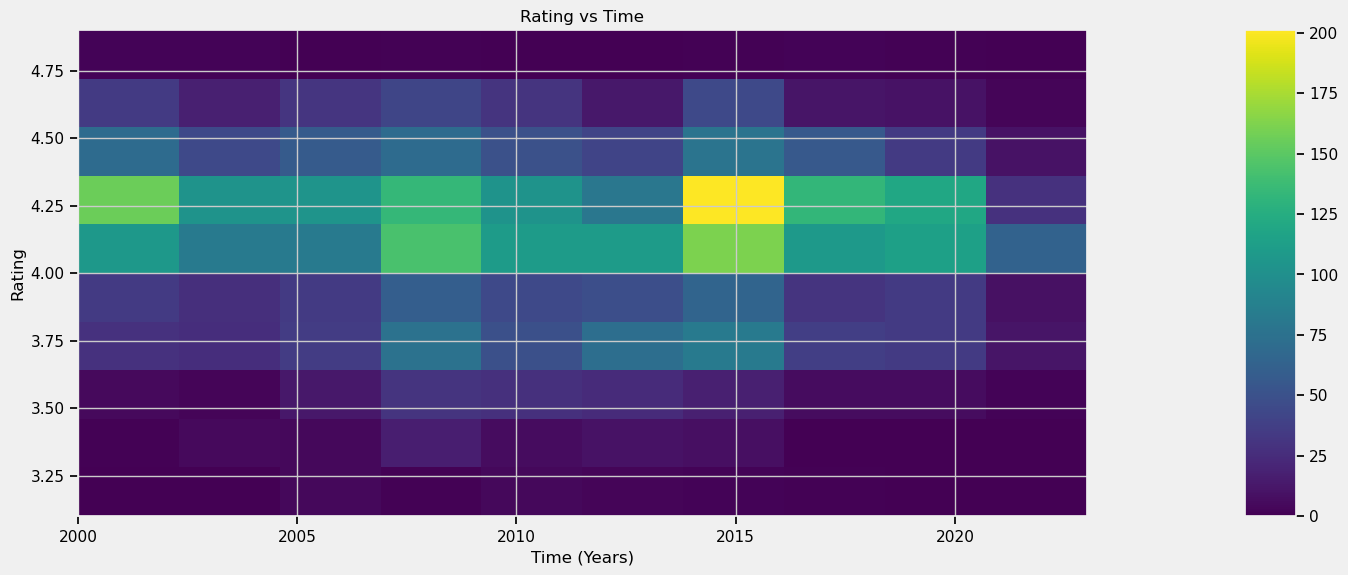

In [14]:
train = train[(train['Year'] >= 2000)]

#Define figure size
fig = plt.figure(figsize = (14, 6)) 
gs = fig.add_gridspec(1, 2, width_ratios = [20, 1], wspace=0.3)

#Create heatmap
heatmap, xedges, yedges = np.histogram2d(train['Year'], train['Ratings Average'], bins=(10, 10))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#Add Heatmap
ax0 = fig.add_subplot(gs[0, 0])
img = ax0.imshow(heatmap.T, extent = extent, origin = 'lower', cmap = 'viridis', aspect = 'auto')
ax0.set_title('Rating vs Time')
ax0.set_xlabel('Time (Years)')
ax0.set_ylabel('Rating')

#Add colour bar
ax1 = fig.add_subplot(gs[0, 1])
cbar = fig.colorbar(img, cax=ax1)

#Plot
plt.show()

## Data Cleaning Engineering
Following the input of the data, extensive measurements must be taken to clean and format the data. 

The cleaning process involves: 
- Drops duplicate rows
- Fill NaN values 



In [8]:
def Cleaning_Data(DataFrame_Clean):
    """
    Input: initial DataFrame data

    Cleans a DataFrame_ through four processes:
        1. Drops duplicate rows
        2. fills NaN values 

    Output: Cleaned DataFrame
    """

    #Drops any rows with the name producer/year
    DataFrame_Clean['Producer_Year'] = DataFrame_Clean['Producer'] + DataFrame_Clean['Year'].astype(str)
    DataFrame_Clean = DataFrame_Clean.drop_duplicates(subset = 'Producer_Year')

    #Fills NaN values with the data infront of it. Since hourly data wont have large variation between hours, this approach is valid
    DataFrame_Clean = DataFrame_Clean.fillna(0)

    return DataFrame_Clean

# Feature Engineering

This chunk of code sets out all the features that were considered for the design of a model


In [9]:
def Features(DataFrame):
    """
    Adds all features to the dataframe
    """
    #Add feature for seasonal average temperature
    DataFrame['Winter_Avg_Temp'] = DataFrame[['December Avg Temp (°C)', 'January Avg Temp (°C)', 'February Avg Temp (°C)']].mean(axis = 1)
    DataFrame['Spring_Avg_Temp'] = DataFrame[['March Avg Temp (°C)', 'April Avg Temp (°C)', 'May Avg Temp (°C)']].mean(axis = 1)
    DataFrame['Summer_Avg_Temp'] = DataFrame[['June Avg Temp (°C)', 'July Avg Temp (°C)', 'August Avg Temp (°C)']].mean(axis = 1)
    DataFrame['Fall_Avg_Temp'] = DataFrame[['September Avg Temp (°C)', 'October Avg Temp (°C)', 'November Avg Temp (°C)']].mean(axis = 1)

    #Add feature for humidity average temperature
    DataFrame['Winter_Avg_Humid'] = DataFrame[['December Avg Relative Humidity', 'January Avg Relative Humidity', 'February Avg Relative Humidity']].mean(axis = 1)
    DataFrame['Spring_Avg_Humid'] = DataFrame[['March Avg Relative Humidity', 'April Avg Relative Humidity', 'May Avg Relative Humidity']].mean(axis = 1)
    DataFrame['Summer_Avg_Humid'] = DataFrame[['June Avg Relative Humidity', 'July Avg Relative Humidity', 'August Avg Relative Humidity']].mean(axis = 1)
    DataFrame['Fall_Avg_Humid'] = DataFrame[['September Avg Relative Humidity', 'October Avg Relative Humidity', 'November Avg Relative Humidity']].mean(axis = 1)

    #Add feature for seasonal average precip
    DataFrame['Winter_Avg_Precip'] = (DataFrame[['December Cumulative Precip (mm)', 'January Cumulative Precip (mm)', 'February Cumulative Precip (mm)']].mean(axis=1))
    DataFrame['Spring_Avg_Precip'] = (DataFrame[['March Cumulative Precip (mm)', 'April Cumulative Precip (mm)', 'May Cumulative Precip (mm)']].mean(axis=1))
    DataFrame['Summer_Avg_Precip'] = (DataFrame[['June Cumulative Precip (mm)', 'July Cumulative Precip (mm)', 'August Cumulative Precip (mm)']].mean(axis=1))
    DataFrame['Fall_Avg_Precip'] = (DataFrame[['September Cumulative Precip (mm)', 'October Cumulative Precip (mm)', 'November Cumulative Precip (mm)']].mean(axis=1))

    #Add feature for seasonal average cloud cover
    DataFrame['Winter_Avg_Cloud_Cover'] = DataFrame[['December Avg Cloud Cover (%)', 'January Avg Cloud Cover (%)', 'February Avg Cloud Cover (%)']].mean(axis = 1)
    DataFrame['Spring_Avg_Cloud_Cover'] = DataFrame[['March Avg Cloud Cover (%)', 'April Avg Cloud Cover (%)', 'May Avg Cloud Cover (%)']].mean(axis = 1)
    DataFrame['Summer_Avg_Cloud_Cover'] = DataFrame[['June Avg Cloud Cover (%)', 'July Avg Cloud Cover (%)', 'August Avg Cloud Cover (%)']].mean(axis = 1)
    DataFrame['Fall_Avg_Cloud_Cover'] = DataFrame[['September Avg Cloud Cover (%)', 'October Avg Cloud Cover (%)', 'November Avg Cloud Cover (%)']].mean(axis = 1)
    
    #Add feature for seasonal daylight hours
    DataFrame['Winter_Avg_Daylight_Hrs'] = DataFrame[['December Avg Daylight Hours', 'January Avg Daylight Hours', 'February Avg Daylight Hours']].mean(axis = 1)
    DataFrame['Spring_Avg_Daylight_Hrs'] = DataFrame[['March Avg Daylight Hours', 'April Avg Daylight Hours', 'May Avg Daylight Hours']].mean(axis = 1)
    DataFrame['Summer_Avg_Daylight_Hrs'] = DataFrame[['June Avg Daylight Hours', 'July Avg Daylight Hours', 'August Avg Daylight Hours']].mean(axis = 1)
    DataFrame['Fall_Avg_Daylight_Hrs'] = DataFrame[['September Avg Daylight Hours', 'October Avg Daylight Hours', 'November Avg Daylight Hours']].mean(axis = 1)
    
    return DataFrame

## Selecting Features and Split Data

The feature selection function takes in all the added features, removing many of the ones that were determined to not help the data well. 
- Removed features were done based on the utility graph later on

In [10]:
def Feature_Selection(data):
    """
    Input: Raw data, with every feature from the cleaned train data set
        Commenting them in and out, certain features are chosen for the final model 
    Output: Final dataset, with certain features chosen 
    """
    feature_selected = [
                        # 'Year',

                        'Winter_Avg_Temp', 

                        'Spring_Avg_Temp',

                        'Summer_Avg_Temp',
                        # 'June Avg Temp (°C)',
                        # 'July Avg Temp (°C)',
                        # 'August Avg Temp (°C)',                                       

                        # 'Fall_Avg_Temp',

                        # 'Winter_Avg_Humid', 

                        'Spring_Avg_Humid',

                        # 'Summer_Avg_Humid',

                        # 'Fall_Avg_Humid',

                        'Winter_Avg_Precip', 

                        'Spring_Avg_Precip',

                        # 'Summer_Avg_Precip',

                        # 'Fall_Avg_Precip',

                        # 'Winter_Avg_Cloud_Cover',
                        'January Avg Cloud Cover (%)',
                        'February Avg Cloud Cover (%)',

                        'Spring_Avg_Cloud_Cover',
                        'March Avg Cloud Cover (%)',
                        # 'April Avg Cloud Cover (%)',
                        # 'May Avg Cloud Cover (%)',

                        'Summer_Avg_Cloud_Cover',

                        # 'Fall_Avg_Cloud_Cover',

                        'Winter_Avg_Daylight_Hrs',

                        'Spring_Avg_Daylight_Hrs',

                        'Summer_Avg_Daylight_Hrs',

                        # 'Fall_Avg_Daylight_Hrs',

                        
                        ]

    selected_data = data[feature_selected]
    selected_data = selected_data.astype(np.float32)

    return selected_data

In [11]:
train = Cleaning_Data(train)
train = Features(train)

X_data = Feature_Selection(train)
y_data = train['Ratings Average']

model = RandomForestRegressor() 

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, train_size = 0.8, random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(r2_score(y_val, y_pred))

0.0368690129174426



Top 15 Important Features:
                         Feature  Importance
2                Summer_Avg_Temp    0.210249
7   February Avg Cloud Cover (%)    0.175951
10        Summer_Avg_Cloud_Cover    0.149402
4              Winter_Avg_Precip    0.096228
1                Spring_Avg_Temp    0.063115
11       Winter_Avg_Daylight_Hrs    0.051655
8         Spring_Avg_Cloud_Cover    0.051549
6    January Avg Cloud Cover (%)    0.048169
5              Spring_Avg_Precip    0.033124
3               Spring_Avg_Humid    0.032420
0                Winter_Avg_Temp    0.032093
9      March Avg Cloud Cover (%)    0.027338
12       Spring_Avg_Daylight_Hrs    0.016148
13       Summer_Avg_Daylight_Hrs    0.012559


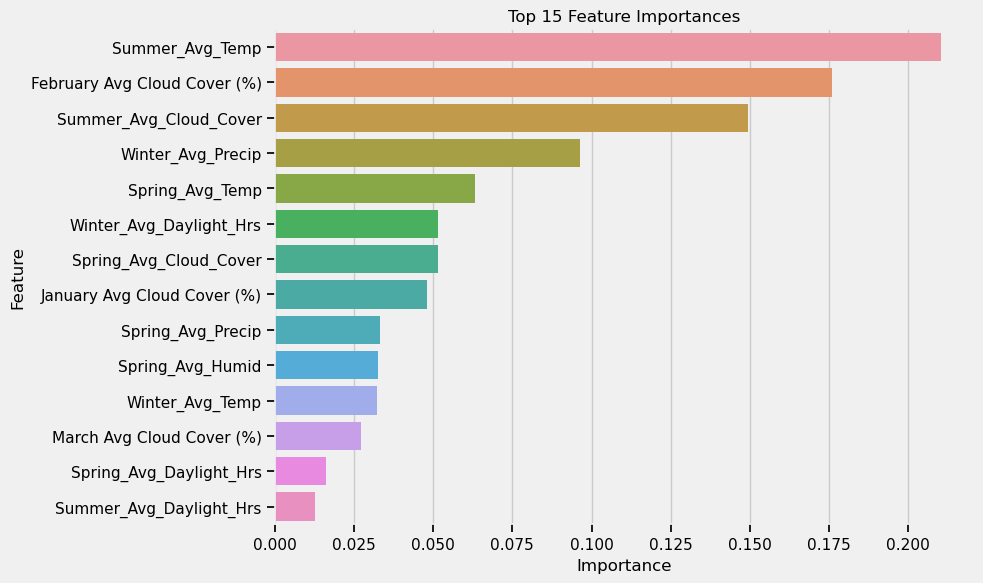

In [12]:
# Feature importances
importances = model.feature_importances_
feature_names = X_data.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("\nTop 15 Important Features:")
print(feature_importance_df.head(15))

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

In [13]:
for i in train.columns:
    print(i)

Producer
WineType
District
Year
Ratings Average
Price
Type
January Max Temp (°C)
January Min Temp (°C)
January Avg Temp (°C)
January Max Relative Humidity
January Min Relative Humidity
January Avg Relative Humidity
January Cumulative Rain (mm)
January Cumulative Snow (mm)
January Cumulative Precip (mm)
January Avg Cloud Cover (%)
January Max Wind Speed (Km/h)
January Min Wind Speed (Km/h)
January Avg Wind Speed (Km/h)
January Avg Daylight Hours
February Max Temp (°C)
February Min Temp (°C)
February Avg Temp (°C)
February Max Relative Humidity
February Min Relative Humidity
February Avg Relative Humidity
February Cumulative Rain (mm)
February Cumulative Snow (mm)
February Cumulative Precip (mm)
February Avg Cloud Cover (%)
February Max Wind Speed (Km/h)
February Min Wind Speed (Km/h)
February Avg Wind Speed (Km/h)
February Avg Daylight Hours
March Max Temp (°C)
March Min Temp (°C)
March Avg Temp (°C)
March Max Relative Humidity
March Min Relative Humidity
March Avg Relative Humidity
Mar